In [95]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [96]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [97]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3395
Number of variables in Combined dataset 161


In [98]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [99]:
df.head(5)

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21 00:00:00.0,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,NaN,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,Benign,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),Tumou

In [100]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 161 columns):
PATIENTNUMBER                         3395 non-null object
PROCNAME                              3395 non-null object
CENTERCODE                            3395 non-null object
SURGEONCODE                           949 non-null object
RECPROGRESS                           3395 non-null object
CREATEDDATE                           3395 non-null object
GENDER                                3384 non-null object
DATEOFBIRTH                           2028 non-null float64
AGEATSURGERY                          3376 non-null float64
MARITALSTATUS                         2160 non-null object
RACE                                  2099 non-null object
EDUCATION                             1927 non-null object
WEIGHT                                2363 non-null float64
HEIGHT                                2361 non-null float64
BMI                                   3009 non-null float64
CLI

In [101]:
# Prepare target variable for morbidity
df['30_day_COMPLICATIONS'] = 0
df.loc[df['INTRAOPCOMPLICATIONS'].notnull() | df['SURGICALCOMPLICATIONS'].notnull() | df['NONSURGICALCOMPLICATIONS'].notnull(),['30_day_COMPLICATIONS']] = 1

In [102]:
# Total Number patients with complications
print('Total number of patients {}'.format(len(df)))
print('Total number of patients with complications {}'.format(df['30_day_COMPLICATIONS'].sum()))
print('Total % of patients with complications {:.3f}'.format(df['30_day_COMPLICATIONS'].sum()/len(df)))

Total number of patients 3395
Total number of patients with complications 315
Total % of patients with complications 0.093


### Define numeric columns and identify missing values

In [103]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION'
] 

In [104]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [105]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,30_day_COMPLICATIONS
count,2028.00,3376.00,2363.00,2361.00,3009.00,3198.00,2816.00,2775.00,2551.00,2425.00,2121.00,3330.00,152.00,2657.00,177.00,2152.00,2014.00,2788.00,3129.00,3271.00,1298.00,1448.00,2358.00,1829.00,944.00,571.00,612.00,795.00,582.00,492.00,440.00,450.00,654.00,411.00,430.00,3186.00,2941.00,1531.00,650.00,2765.00,1407.00,2446.00,2034.00,1909.00,3392.00,3395.00
mean,1956.34,57.70,89.99,163.90,28.68,34.48,1.52,3.52,20.35,46.59,7210.94,4.41,586.08,80.36,730.84,8.40,1.89,1.06,19.84,184.87,49.74,59.47,19.52,97.95,1983.51,166.26,164.61,109.36,214.76,2805.69,232.06,271.79,146.10,293.22,2756.73,3.82,10.87,73.10,193.77,133.74,15.02,0.28,1.09,16.89,2013.33,0.09
std,13.26,12.72,55.94,39.74,5.92,37.87,2.00,2.28,80.19,102.09,3348.54,57.36,466.89,30.38,396.76,1.74,0.82,0.29,36.62,223.21,179.15,166.94,133.60,170.18,4248.06,351.86,340.25,310.10,345.24,4982.11,411.12,422.01,351.87,401.95,4138.05,25.07,23.69,252.83,385.78,337.49,142.76,0.45,31.32,19.59,2.98,0.29
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,66.50,65.29,210.00,7.00,1.00,1.00,14.00,50.00,11.00,30.40,0.96,52.64,9.18,10.90,27.30,0.91,49.75,9.50,10.70,29.02,0.90,55.78,9.12,2.00,2.40,1.00,2.00,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1956.00,59.00,79.83,169.00,27.59,30.00,1.00,3.00,13.90,40.80,7000.00,0.91,999.00,79.32,999.00,8.00,2.00,1.00,18.00,100.00,12.10,35.00,1.00,65.00,11.60,12.20,34.20,1.17,67.78,12.00,12.20,35.20,1.12,74.65,999.00,3.00,3.60,2.00,5.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.25,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,94.00,999.00,10.00,3.00,1.00,23.00,200.00,13.30,38.30,1.30,81.00,18.85,14.50,40.60,1.58,94.99,4990.00,14.22,832.25,1.54,141.00,4300.00,4.00,8.20,5.00,25.00,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,999.00,101.00,2018.00,1.00


In [106]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [107]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [108]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,30_day_COMPLICATIONS
count,2028.00,3376.00,2353.00,2358.00,3009.00,3194.00,2816.00,2775.00,2534.00,2398.00,2098.00,3319.00,67.00,2641.00,56.00,2152.00,2014.00,2788.00,3125.00,3268.00,1254.00,1404.00,2315.00,1762.00,897.00,485.00,525.00,709.00,484.00,466.00,342.00,337.00,559.00,308.00,333.00,3184.00,2940.00,1423.00,528.00,2400.00,1375.00,2446.00,2032.00,1909.00,3392.00,3395.00
mean,1956.34,57.70,88.04,162.84,28.68,33.27,1.52,3.52,13.79,35.87,7279.04,1.11,62.23,79.91,151.44,8.40,1.89,1.06,18.59,184.12,16.44,30.03,1.33,66.24,2035.09,18.60,26.34,1.45,63.41,2906.49,12.30,27.95,1.15,65.96,3268.74,3.19,10.54,4.10,11.12,2.15,0.12,0.28,0.11,16.89,2013.33,0.09
std,13.26,12.72,37.17,26.32,5.92,16.40,2.00,2.28,1.75,14.40,3302.70,3.27,23.65,24.63,61.02,1.74,0.82,0.29,10.66,221.94,21.64,13.90,4.59,21.75,4351.91,27.08,15.71,6.51,24.83,5100.64,10.87,22.37,0.56,36.50,4578.29,2.47,15.14,10.41,46.63,0.67,2.28,0.45,0.64,19.59,2.98,0.29
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.80,36.00,5600.00,0.78,42.00,65.01,110.00,7.00,1.00,1.00,14.00,50.00,11.00,30.17,0.95,52.00,9.10,10.70,1.46,0.90,47.22,9.30,10.40,25.70,0.86,49.92,8.50,2.00,2.40,1.00,1.80,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1956.00,59.00,79.60,169.00,27.59,30.00,1.00,3.00,13.90,40.70,7000.00,0.91,58.00,79.05,132.00,8.00,2.00,1.00,18.00,100.00,12.00,34.95,1.00,64.00,11.30,11.90,32.70,1.10,62.80,11.60,11.70,32.80,1.07,65.00,11.80,3.00,3.60,2.00,3.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.00,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,83.00,93.59,182.50,10.00,3.00,1.00,23.00,200.00,13.18,38.00,1.29,79.00,15.80,13.10,36.90,1.40,79.00,5635.00,12.70,37.00,1.27,79.25,6940.00,4.00,8.20,4.00,8.00,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,124.00,253.97,340.00,14.00,3.00,6.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,4.00,70.00,1.00,12.00,101.00,2018.00,1.00


In [109]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [110]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

### Define Categorical columns

In [111]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [112]:
# list of variables included for Intra-Op complications 
intra_op_col = [
#'PATIENTNUMBER',
#'PROCNAME',
#'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
#'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
#'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
#'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
#'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
'Consistencyoftheotherexcisedtumors',
#'ACCESS',
#'DAVINCIMODEL',
#'ROBOTICSARMS',
#'ASSISTENTTROCARS',
#'DUALCONSOLE',
#'PRIMARYSURGEON',
#'OPERATIVETIMEmin',
#'ISCHEMIA',
#'CLAMPARTERY',
#'SELECTIVEARTERIALCLAMPING',
#'CLAMPVEIN',
#'EARLYUNCLAMPING',
#'FLUORESCENCE',
#'INNERRENORRHAPHY',
#'OUTERRENORRHAPHY',
#'ISCHEMIATIMEmin',
#'UCSREPAIR',
#'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails',
#'LYMPHNODEDISSECTIONLND',
#'BLOODLOSSml',
#'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS',
#'INTRAOPCOMPLICATION',
#'INTRAOPCOMPLICATIONS',
'30_day_COMPLICATIONS'    
]

### Data Cleaning

In [113]:
# Selecting dataframe relevant columsn for analysis
df = df[intra_op_col].copy()

In [114]:
#remove extreme values lower 2.5 and upper 2.5 then check the plots
target = '30_day_COMPLICATIONS'

In [115]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,LOCATIONTOPOLARLINE,NOOFLESIONS,30_day_COMPLICATIONS
count,3376.000000,3009.000000,3194.000000,2534.000000,2398.000000,2098.000000,3319.000000,67.000000,2641.000000,56.000000,2014.000000,2788.000000,3395.000000
mean,57.704976,28.681941,33.272041,30.025083,41.279775,7584.309314,1.108866,62.230448,79.910629,151.437500,1.892751,1.055954,0.092784
std,12.723756,5.916510,16.395130,118.669940,6.107906,4960.175584,3.265859,23.648291,24.631750,61.022728,0.817358,0.293006,0.290172
min,16.000000,15.100000,0.000000,10.000000,10.400000,0.000000,0.000000,18.000000,0.020000,43.500000,1.000000,0.000000,0.000000
25%,49.000000,24.590000,22.000000,12.900000,38.300000,5770.000000,0.780000,42.000000,65.010000,110.000000,1.000000,1.000000,0.000000
50%,59.000000,27.590000,30.000000,14.000000,41.600000,7100.000000,0.910000,58.000000,79.050000,132.000000,2.000000,1.000000,0.000000
75%,67.000000,31.710000,42.000000,15.000000,44.475000,8600.000000,1.100000,83.000000,93.590000,182.500000,3.000000,1.000000,0.000000
max,89.000000,55.600000,135.000000,990.000000,180.000000,186000.000000,96.000000,124.000000,253.971416,340.000000,3.000000,6.000000,1.000000


In [116]:
numeric_stats = df.describe()

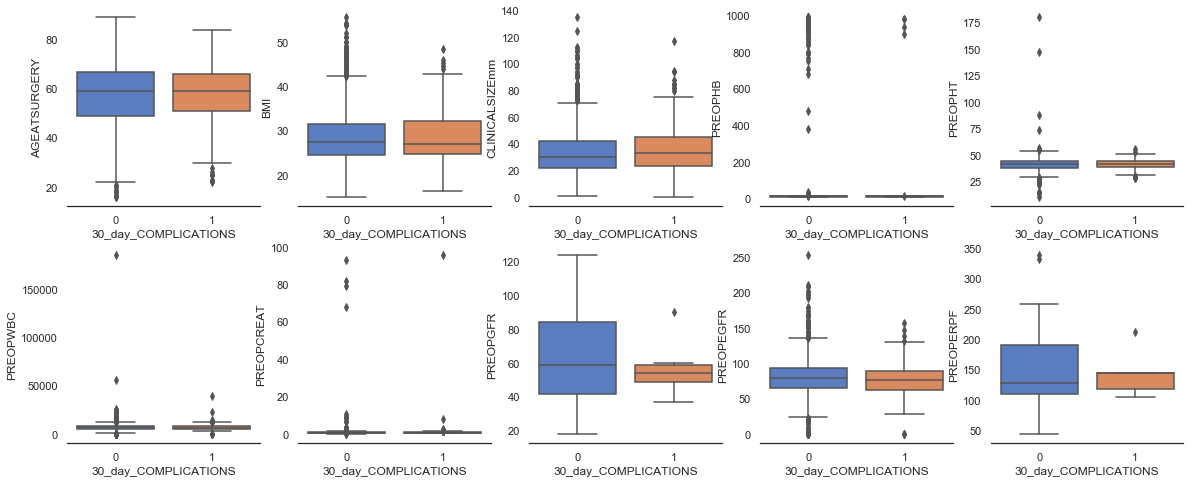

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'PREOPERPF', x = target, ax=axes[1, 4])

In [118]:
# Check the number of outliers
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPGFR','PREOPEGFR','PREOPERPF']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    print(i, len(df.loc[(df[i]<=LL)|(df[i]>=UL)]))

BMI 97
CLINICALSIZEmm 79
PREOPHB 55
PREOPHT 41
PREOPWBC 124
PREOPCREAT 163
PREOPGFR 0
PREOPEGFR 77
PREOPERPF 2


In [119]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPGFR','PREOPEGFR','PREOPERPF']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [120]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,LOCATIONTOPOLARLINE,NOOFLESIONS,30_day_COMPLICATIONS
count,2834.000000,2511.000000,2718.000000,2141.000000,2011.000000,1713.000000,2797.000000,49.000000,2174.000000,23.000000,1653.000000,2332.000000,2851.000000
mean,57.568454,28.101034,31.759124,13.913526,41.556738,7205.871535,0.927822,65.908776,81.066642,182.847826,1.894737,1.046312,0.089793
std,12.567070,5.048146,13.850523,1.443346,4.247776,1950.919183,0.209679,22.920155,18.815583,54.225002,0.818847,0.245944,0.285935
min,16.000000,15.100000,0.000000,10.000000,29.800000,1840.000000,0.360000,35.000000,34.000000,43.500000,1.000000,0.000000,0.000000
25%,49.000000,24.450000,22.000000,12.900000,38.800000,5700.000000,0.780000,44.000000,67.405000,144.500000,1.000000,1.000000,0.000000
50%,59.000000,27.280000,30.000000,14.000000,41.900000,7000.000000,0.900000,60.000000,80.000000,196.000000,2.000000,1.000000,0.000000
75%,67.000000,31.221300,40.000000,15.000000,44.700000,8360.000000,1.060000,86.000000,93.142500,227.500000,3.000000,1.000000,0.000000
max,89.000000,42.300000,71.000000,17.800000,53.700000,12840.000000,1.570000,124.000000,136.080000,258.000000,3.000000,4.000000,1.000000


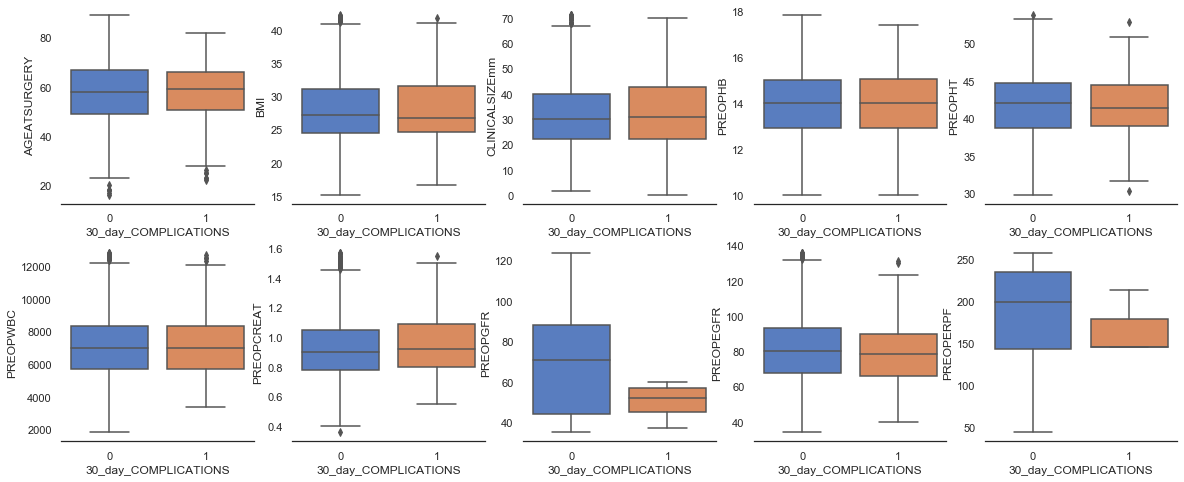

In [121]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'PREOPERPF', x = target, ax=axes[1, 4])

In [122]:
# The percentage of missing data
df.isnull().mean()

GENDER                                0.003858
AGEATSURGERY                          0.005963
MARITALSTATUS                         0.367590
RACE                                  0.396352
EDUCATION                             0.441599
BMI                                   0.119256
CLINICALSIZEmm                        0.046650
ECOG                                  0.463346
SYMPTOMS                              0.233251
SOLITARYKIDNEY                        0.141705
TYPEOFSOLITARYKIDNEY                  0.966328
BILATERALITYOFTUMOR                   0.393195
SIDEOFTUMOR                           0.332164
SIDEOFSURGERY                         0.003508
PREOPMULTIFOCALITY                    0.731673
FACE                                  0.247632
TUMORlOCATION                         0.140302
PREOPHB                               0.249035
PREOPHT                               0.294633
PREOPWBC                              0.399158
PREOPCREAT                            0.018941
PREOPGFR     

In [123]:
#Keep columns having less than 50% missing data
df = df[df.columns[df.isnull().mean() < 0.50]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 37


In [124]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [125]:
# calculate number of records with over 75% missing data
print(" Records with >75% missing data {}".format(sum(df['Missing']> round((len(df.columns)-1)*.75))))

 Records with >75% missing data 14


In [126]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-1)*.75) ].copy()

In [127]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [128]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean(),2), inplace = True)

In [129]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2850
Data columns (total 38 columns):
GENDER                           2837 non-null object
AGEATSURGERY                     2837 non-null float64
MARITALSTATUS                    2837 non-null object
RACE                             2837 non-null object
EDUCATION                        2837 non-null object
BMI                              2837 non-null float64
CLINICALSIZEmm                   2837 non-null float64
ECOG                             2837 non-null object
SYMPTOMS                         2837 non-null object
SOLITARYKIDNEY                   2837 non-null object
BILATERALITYOFTUMOR              2837 non-null object
SIDEOFTUMOR                      2837 non-null object
SIDEOFSURGERY                    2837 non-null object
FACE                             2837 non-null object
TUMORlOCATION                    2837 non-null object
PREOPHB                          2837 non-null float64
PREOPHT                  

In [130]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'GENDER': 3,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'ECOG': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 4,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 6,
 'RADIUSmaximaldiameterincm': 4,
 'EXOPHYTICENDOPHYTICPROPERTIES': 5,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3}

In [131]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
    if unique_count_list[col]<=10:
        df[col] = df[col].astype('category').copy()

In [132]:
# list of features with object type
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

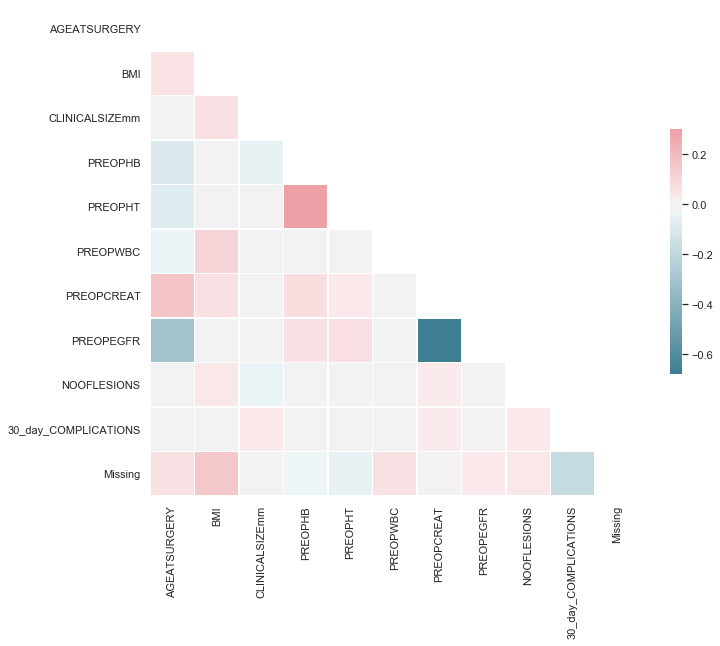

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [134]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2850
Data columns (total 38 columns):
GENDER                           2837 non-null category
AGEATSURGERY                     2837 non-null float64
MARITALSTATUS                    2837 non-null category
RACE                             2837 non-null category
EDUCATION                        2837 non-null category
BMI                              2837 non-null float64
CLINICALSIZEmm                   2837 non-null float64
ECOG                             2837 non-null category
SYMPTOMS                         2837 non-null category
SOLITARYKIDNEY                   2837 non-null category
BILATERALITYOFTUMOR              2837 non-null category
SIDEOFTUMOR                      2837 non-null category
SIDEOFSURGERY                    2837 non-null category
FACE                             2837 non-null category
TUMORlOCATION                    2837 non-null category
PREOPHB                          2837 non-null float64
P

In [135]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting 30 day complications: {}".format(len(df)))

Number records for predicting 30 day complications: 2837


In [136]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [137]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [138]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'ECOG': {'Ambulatory and capable of all selfcare but unable to carry out any work activities. Up and about more than 50% of waking hours': 0,
  'Capable of only limited selfcare, confined to bed or chair more than 50% of waking hours': 1,
  'Fully active, able to carry on all pre-disease performance without restriction': 2,
  'NA': 3,
  'Restricted in physically strenuous activity but ambulatory and able to carry out work of a light or sedentary': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2

In [139]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [140]:
df_codes.head()

,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,ECOG,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,30_day_COMPLICATIONS,Missing
0,1,61.0,1,1,0,25.10,33.0,2,0,2,1,1,1,0,0,12.3,39.4,5400.0,1.25,58.72,2,0,1,0,1,1,1,1,1,1,0,2,1,1,1,1.0,1,0.0
1,1,58.0,1,1,2,23.18,44.0,2,0,1,1,1,1,0,2,14.0,41.0,5100.0,0.90,86.67,1,0,2,1,0,2,1,1,0,1,0,0,2,1,1,1.0,1,1.0
2,1,56.0,1,1,2,23.36,31.8,2,0,1,1,1,1,0,0,10.2,36.4,5200.0,0.70,116.66,2,2,1,1,1,1,1,1,1,0,1,0,0,1,1,1.0,1,2.0
3,0,65.0,1,4,2,26.67,31.8,4,0,1,1,1,1,1,4,11.8,36.0,5300.0,1.12,48.82,2,2,1,0,1,1,1,1,1,1,2,2,0,1,1,1.0,1,3.0
4,0,23.0,3,4,2,19.65,23.0,2,0,1,1,3,3,2,3,13.3,39.2,12100.0,0.70,103.70,1,0,2,2,1,1,1,1,1,3,0,3,2,1,1,1.0,1,2.0


In [141]:
df_codes.drop(labels='Missing', axis='columns', inplace=True)

In [142]:
# print median , IQR for numeric columns 
for i in ['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 59.0 [49.0-67.0]
BMI 28.1 [24.8-30.7]
CLINICALSIZEmm 30.0 [22.0-40.0]
PREOPHB 13.9 [13.3-14.6]
PREOPHT 41.6 [40.0-43.3]
PREOPWBC 7205.9 [6600.0-7400.0]
PREOPCREAT 0.9 [0.8-1.1]
PREOPEGFR 81.1 [71.2-88.5]
NOOFLESIONS 1.0 [1.0-1.0]


In [143]:
cat_variables = ['GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'FACE',
'TUMORlOCATION',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'CT',
'CN',
'CM',
'ANTERIORORPOSTERIOR',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'LOCATIONTOPOLARLINE'
]

for i in cat_variables:
    print(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts(), "\n")

Male      1844
Female     992
NA           1
Name: GENDER, dtype: int64 

Married     1501
NA          1034
Single       184
Divorced      62
Widowed       56
Name: MARITALSTATUS, dtype: int64 

NA                 1116
White/Caucasian    1016
Others              372
Mongoloid/Asian     271
Black                62
Name: RACE, dtype: int64 

NA                  1245
Not Provided         730
Graduate             412
Upto High School     269
Post Graduate        181
Name: EDUCATION, dtype: int64 

NA                                                                                                                                1307
Fully active, able to carry on all pre-disease performance without restriction                                                    1245
Restricted in physically strenuous activity but ambulatory and able to carry out work of a light or sedentary                      258
Ambulatory and capable of all selfcare but unable to carry out any work activities. Up and about

In [144]:
df_codes.corr()['30_day_COMPLICATIONS']

GENDER                          -0.019519
AGEATSURGERY                     0.003867
MARITALSTATUS                   -0.048638
RACE                             0.224599
EDUCATION                        0.159121
BMI                              0.002326
CLINICALSIZEmm                   0.030152
ECOG                             0.059449
SYMPTOMS                        -0.121557
SOLITARYKIDNEY                   0.065713
BILATERALITYOFTUMOR              0.271363
SIDEOFTUMOR                     -0.068196
SIDEOFSURGERY                    0.004644
FACE                             0.037292
TUMORlOCATION                    0.001392
PREOPHB                          0.005779
PREOPHT                         -0.004166
PREOPWBC                        -0.000373
PREOPCREAT                       0.025230
PREOPEGFR                       -0.023063
POLARLOCATION                    0.060379
RIMLOCATION                     -0.021838
RENALSINUS                       0.075211
EXOPHYTICRATE                   -0

In [145]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['30_day_COMPLICATIONS'])/len(df_codes)*100))

Number of patients 2837
% of patients with complications 9.02%


In [146]:
output_path = 'H:\RediMinds\VCQI'
df_codes.to_csv(output_path+"\VCQI_clean_30_day_complications.csv",index=False)

In [147]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['30_day_COMPLICATIONS'])

In [148]:
# Percentage of complications in trainset
train['30_day_COMPLICATIONS'].sum()/len(train)

0.09017632241813602

In [149]:
# Percentage of complications in testset
test['30_day_COMPLICATIONS'].sum()/len(test)

0.0903755868544601

In [150]:
# Save train and test dataset
train.to_csv(output_path+"\VCQI_clean_train_30_day_complications.csv",index=False)
test.to_csv(output_path+"\VCQI_clean_test_30_day_complications.csv",index=False)

In [151]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col_30_day_complications', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)